# EDA

In [0]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
# データの読み込みと、データのサイズ（行, 列）を表示
train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('application_test.csv',)

print('train shape: {}'.format(train_df.shape))
print('test  shape: {}\n'.format(test_df.shape))

In [0]:
# データのプロファイリング(各特徴量のヒストグラムや欠損値の有無を表示)
import pandas_profiling as pdp

profile = pdp.ProfileReport(train_df)
profile.to_file(outputfile="train_profile.html")

from IPython.display import HTML
HTML(filename='train_profile.html')

In [23]:
train_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'], as_index=False).mean().sort_values(by='TARGET', ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


In [0]:
df_gen = train_df[["CODE_GENDER", "TARGET"]]
df_gen

In [26]:
df_filtered = df_gen.groupby("CODE_GENDER",as_index=False).aggregate("mean")
df_filtered

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


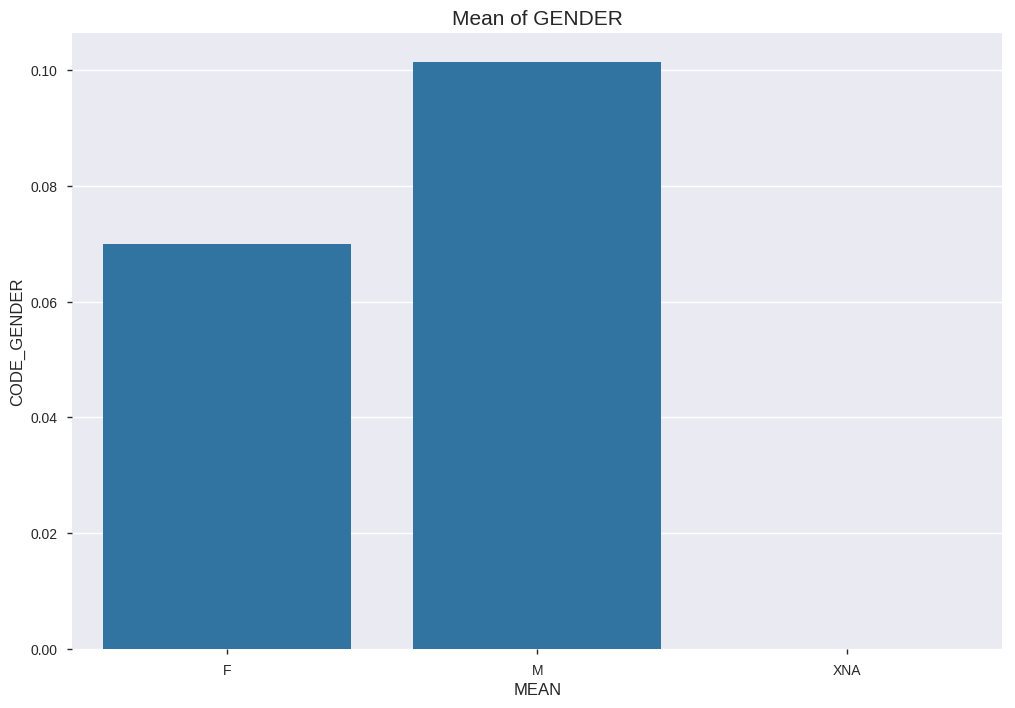

In [27]:
color = sns.color_palette()

plt.figure(figsize=(12,8))
sns.barplot(x="CODE_GENDER",y="TARGET",data=df_filtered,color=color[0])      

plt.ylabel('CODE_GENDER', fontsize=12)
plt.xlabel('MEAN', fontsize=12)
plt.title("Mean of GENDER", fontsize=15)
plt.show()

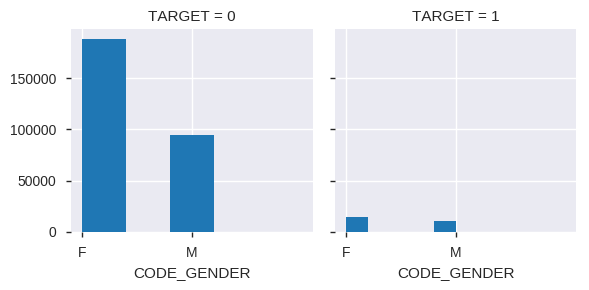

In [63]:
g = sns.FacetGrid(train_df, col='TARGET')
g.map(plt.hist, 'CODE_GENDER', bins=5)

男性と女性で問題のある人の目立った差は見られなかった

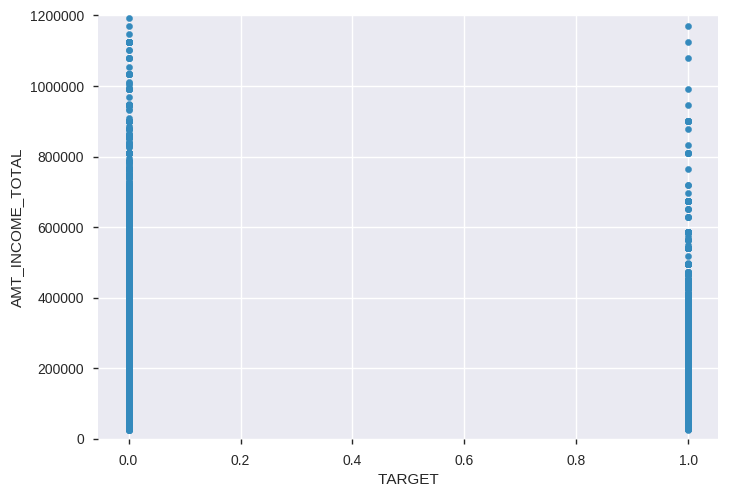

In [48]:
#scatter plot grlivarea/saleprice
var = 'TARGET'
data = pd.concat([train_df['AMT_INCOME_TOTAL'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='AMT_INCOME_TOTAL', ylim=(0,1200000));

年収の低い人は返済能力に問題が生じるのではないかという予想を立てた。
結果的にはその傾向が見えた。

## 所感
EDAについてのやり方の私なりのイメージが湧いただけでもかなりの収穫だった。  
また、グラフの描画能力の足りなさ、データに対するグラフの適切な選択の仕方も問題を感じた。  
中村メンターのおっしゃっていた、「理解ー仮定ー検証」というのはEDAの基本イメージとして大変ありがたい言葉だった。　　
そのための適切な方法を常にピックアップして今後のEDAは進めて行きたいと感じた。

具体的には、Kaggleにおいては、kernelを利用する。Introductionタイプのものや、EDAタイプのものが序盤に役に立ちそうだった。  
全体的な俯瞰を素早く行うことができ、その上で求めたい情報（ex: 使いたいモデルを用いたkernelはあるか、ある変数同士の相関を求めるにはどうするのか）を探すことができる。  
プロのEDAはかなり強力で、最初に私が満たしたい疑問は晴れるほどだった。  
これらを読んだ上で行う行動が…、やっとスタートラインなのかなと思った笑  

本日はスタートラインを見つけたのできっとかなりの上出来である